# 363-1098-00L Business Analytics FS2020

## Focus: Supervised Machine Learning

Group Members: 
Syed Shahvaiz Ahmed (syahmed)
Nael Prelaz (nprelaz)
Clive Charles Javara (javarac)

Topic: Telecommunication customer retain
Link: Telco Customer Churn
Data Source: Kaggle

Problem Statement: Analyze all relevant data and learn behavior to retain customers.

Motivation:

The primary motivation for attrition rates came during the Business Analytics class only (check submitted presentation) where we had an idea about using ML algorithms to train and retain employees. We wanted to work on similar lines and we found this dataset which differs in a manner that this allows for retaining Telco customers. The dataset is nice and clean and offers a decent prediction problem based on the customer’s behavior. If a company can identify as to which customers are going to cancel their subscriptions then they can target them specifically with offers in order to retain them. The dataset deals with “text” and “numbers” and will give us an exciting opportunity to learn as to how to deal with such a situation (which is pretty common in the industry). 


## Data Set Description: 

Context: "Predict behavior to retain customers (if the customer will stay with the network or leave). We analyze all relevant customer data which might be useful to develop focused customer retention programs."

Content: Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

## Description of Variables in the dataset.

- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

## Project Overview:

1. Data Overview
    - Missing Value Identification
2. Data Manipulation
3. Exploratory Data Analysis
    - 3.1 Overall distribution of the Churn Variable
    - 3.2 Distribution of Categorical variables across the attrition (Churn and Non Churn)
4. Data preprocessing
    - 4.1 Preprocessing
    - 4.2 Standardization
    - 4.3 Balancing using SMOTE 
5. Model Building
    - 5.1 Strategy
    - 5.2 Defining Functions for Plotting.
    - 5.3 Models Evaluated in Reduced Dimensional Space
        - Principal Component Analysis 
            - 5.3.1 Logistic Regression
    - 5.4 Models Evaluated in Higher Dimensional Space
        - 5.4.1 Support Vector Machine
        - 5.4.2 Random Forest
        - 5.4.3 K Nearest Neigbour
        - 5.4.4 Decision Trees
        - 5.4.5 Neural Networks
6. Model Comparison
    - 6.1 Overall Comparison
    - 6.2 AUC and Accuracy Comparison
    - 6.3 Confusion Matrix Comparison
    - 6.4 Precision Recall Curves Comparison
7. Conclusion
8. Acknowledgements

## Instructions to Run the file:

Please read the Readme.txt file that is submitted with this project. It carries the instructions to run the file in a flawless manner. After following through the steps indicated in the Readme.txt, run the first two lines of this notebook to ensure that all relevant libraries are installed before moving forward with running all cells all together. If some dependencies are still not satisfied then please install them manually either with conda or pip (depending on interface). Once the 2nd line of this notebook shows no errors then you can run all cells below (using the option 'Run all below' under 'Cell' in Jupyter Notebook).

In the case that the user doesn't want to run the whole notebook then it might be the case that some visualizations will not work once the file is downloaded to a new machine (incomplete rendering/plots are not saved). So it is pertinent that you run the notebook to view all plots. 

Since the notebook carries 6 different classification models the average time for the whole notebook to run on CPU at 1.6GHz with 8192MB RAM is roughly 15 mins. On GPU, the performance significantly varies between 8-10 mins. 

__Optimal way to run (and view) the Notebook__

The optimal way to view the notebook after all dependencies have been installed is through a 24 inch desktop in a portrait format. That way, the user will be able to view all visualization properly without any dimensional issue.

__Note: Due to the randomization in Cross validation across the models, there might be a slight discrepancy (< 0.01) in the relevant accuracy score reported in the notebook as compared to the ones posted in the report. This could also be due to the computational lag in CPU power. But, as mentioned, the accuracy of reported results differ by a factor of 0.01 which can be termed as negligible.__

## Initial Import of Libraries

#### This piece of code below allows us to disable the autoscroll function of the IPython notebook. It can be hashed out if the user wishes to avoid going through all the EDA plots in one sitting.

In [54]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [55]:
# Importing all the relevant packages for Exploratory data analysis and Model development.

%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

# General math, csv and plotting modules.
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

# Widget and formatting modules
import ipywidgets
from ipywidgets import interact, interactive, interact_manual
import pylab
import seaborn as sns
pylab.rcParams['figure.figsize'] = (10, 5)

# Visualization Libraries
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
from matplotlib.pyplot import figure

# Loading the required libraries 
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

from plotly import __version__
# %matplotlib inline

# import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Data Overview

In [56]:
# Reading the file that contains the data
telco_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Showing few rows of the data
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
# Number of Rows and Columns in the dataset
print ("Rows and Columns: ",telco_df.shape)
# Number of Features that we have to deal with
print ("\n Number of Features : \n",telco_df.columns.tolist())
# To track categorical, binary and textual data
df_unique = pd.DataFrame(telco_df.nunique(), columns = ['Unique Values'])
display(df_unique)

Rows and Columns:  (7043, 21)

 Number of Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


### 1.1 Missing value Identification

In [58]:
## To check missing values in terms of spaces. We find out that Total Charges has missing values that need to be removed
def unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

missingvalue = 0
missingcolumn = []
for i in telco_df.columns:
    for j in telco_df[i].tolist():
        if  j == ' ':
            missingvalue += 1
            missingcolumn.append(i)
print("Number of missing values in spaces are: {}".format(missingvalue))
print("Feature name which contains missing values in spaces: {}".format(unique(missingcolumn)))

## To check missing values in terms of null or nan. 
print("Number of missing values in terms of null or nan: {}".format(telco_df.isnull().sum().values.sum()))

Number of missing values in spaces are: 11
Feature name which contains missing values in spaces: ['TotalCharges']
Number of missing values in terms of null or nan: 0


## 2. Data Manipulation

This is a necessary step because then we can categorize a few things. 

Formally stating: 
1. We can remove the missing values of TotalCharges from our analysis
2. Make a few more modifications from the observed categorical variables
3. Make further distinction in our categorical variables 

This is done so that we can start with our Exploratory Data Analysis

Side Note: Confidence was garnered after we looked at the dataset properly in STATA

In [59]:
# Replacing and Removing the missing values that were identified in the part before
telco_df['TotalCharges'] = telco_df["TotalCharges"].replace(' ',np.nan)
telco_df = telco_df[telco_df["TotalCharges"].notnull()]
print(telco_df.shape) # Notice that the row size has reduced by 11.
telco_df = telco_df.reset_index()[telco_df.columns]

#convert to float type
telco_df["TotalCharges"] = telco_df["TotalCharges"].astype(float)

# To align data set in "Yes and No" settings. Can account for 17 variables in this manner.
categorical_df = telco_df.loc[:, telco_df.dtypes == "object"]
del categorical_df['customerID']
# for col in categorical_df.columns.tolist():
#     print(telco_df[col].value_counts())
    
# # The Senior Citizen column has to be changed to "Yes"/"No" 
# print(telco_df['SeniorCitizen'].value_counts())

(7032, 21)


In [60]:
# Replacing 'No internet service' to No for the following columns (can also be found in Variable description above)
align_columns = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for i in align_columns : 
    telco_df[i]  = telco_df[i].replace({'No internet service' : 'No'})

#Similarly for "MultipleLines" variable we replace 'No phone service' to No
telco_df['MultipleLines'] = telco_df['MultipleLines'].replace({'No phone service': 'No'})
    
# Similarly for the variable "Senior Citizen" we convert it into values 
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Separating churn and non churn customer datasets
churn     = telco_df[telco_df["Churn"] == "Yes"]
non_churn = telco_df[telco_df["Churn"] == "No"]

#Separating catagorical and numerical columns for EDA
Id_col     = ['customerID']
target_col = ["Churn"]
numeric_columns = telco_df._get_numeric_data().columns.tolist()
categorical_columns = list(set(telco_df.columns.tolist())- set(numeric_columns) - set(Id_col) - set(target_col))
print("Number of Categorical Features: ", len(categorical_columns))
print("Number of Numeric Features: ", len(numeric_columns))

Number of Categorical Features:  16
Number of Numeric Features:  3


## 3. Exploratory Data Analysis

We have a feature set of 19 columns that need to be explored in their connection with Churn and Non-Churn.

### 3.1 Overall distribution of the Churn Variable

In [61]:
# Visualizing Churn and Non-Churn percentage using plotly library

trace_pie = go.Pie(labels = telco_df['Churn'].value_counts().keys().tolist(),
                  values = telco_df['Churn'].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  marker = dict(colors=['lightblue','gold'], 
                           line=dict(color='#000000', width=1.5)),
                  rotation = 90,
                  hoverinfo = "label +value")

layout = dict(title =  'Distribution of Churn and Non-Churn Customers',
                        autosize = False,
                        height  = 500,
                        width   = 800)


fig = go.Figure(dict(data = [trace_pie], layout=layout))
py.iplot(fig)

The pie chart above represents the distribution of customers who Churn and who don't. What this essentially means is that 26.6% of customers Churn (leave the network) while 73.4% of customers don't churn (they stay with the network)

### 3.2 Distribution of Categorical variables across the attrition *(Churn and Non Churn)*

In [62]:
# Defining a function so we can use it for all the categorical variables that were defined above. 
# We will use the same code that was defined above (a bit modified ofcourse).
def pie_plot_func (column_name):
    
    # For Churn customers (Section 2)
    trace_pie_1 = go.Pie(labels = churn[column_name].value_counts().keys().tolist(),
                  values = churn[column_name].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  hole = 0.6,
                  hoverinfo = "label+percent",
                  domain = dict(x = [0,.48]),
                  name = "Churn Customers",
                  marker = dict(colors=['lightblue','gold', 'purple', 'red'],line = dict(width = 2, color = '#000000')))
    
    # For Non Churn customers (Section 2)
    trace_pie_2 = go.Pie(labels = non_churn[column_name].value_counts().keys().tolist(),
                  values = non_churn[column_name].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  hole = 0.6,
                  hoverinfo = "label+percent",
                  domain = dict(x = [.52,1]),
                  name = "Non churn customers",
                  marker = dict(colors=['lightblue','gold', 'purple', 'red'],line = dict(width = 2,color = '#000000')))
    
    # Defining layout for the traces
    layout = dict(title = column_name + " distribution in Churn/NonChurn",  autosize = False,
                  height = 500,
                  width = 900,
                  annotations = [dict(text = "Churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                 dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .87,y = .5
                                               )])
    fig = dict(data = [trace_pie_1, trace_pie_2], layout = layout)
#     configure_plotly_browser_state()
    py.iplot(fig)

for var in categorical_columns:
    pie_plot_func(var)

### 3.3 Distribution of Numerical variables across the attrition (Churn and Non Churn)

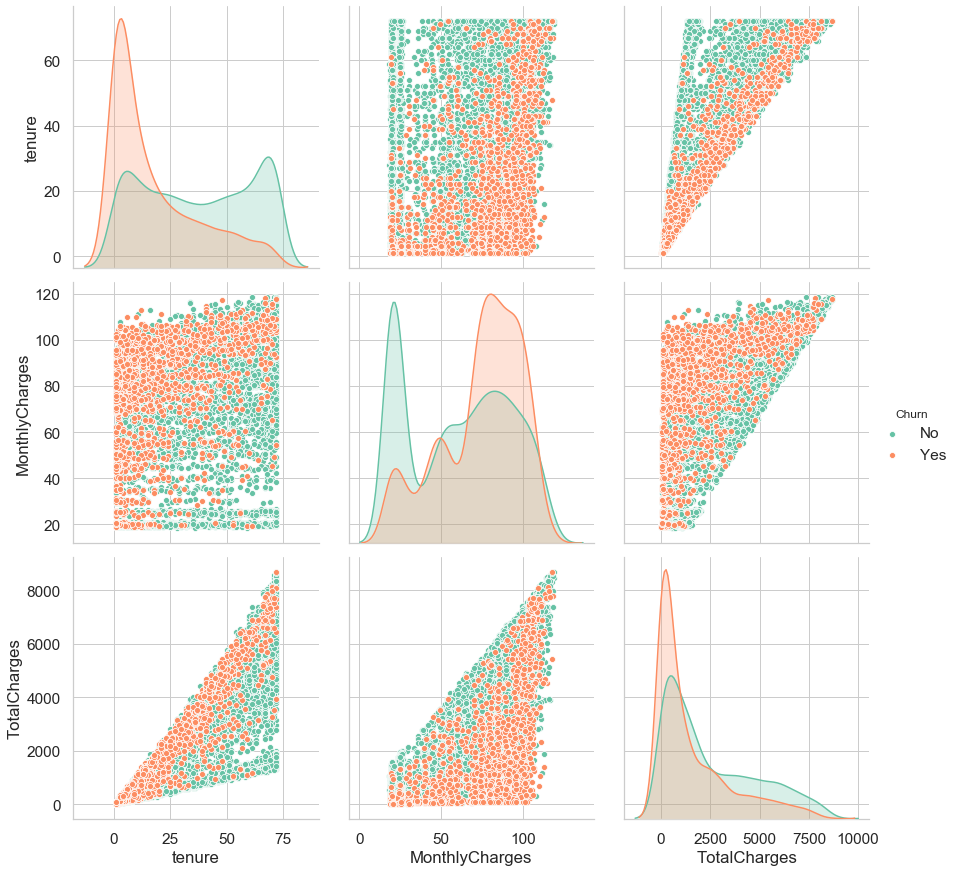

In [63]:
#2_d Scatter plot with color-coding for each feature type using seaborn 
sns.set_style("whitegrid");
sns.pairplot(telco_df,hue="Churn",size=4, palette= "Set2");
plt.show();

Few things to note from the seaborne plot above is that the highest churn customers were in the bracket of low tenure and high monthly charges. We also see a clear cut positive relationship between tenure and total charges. This kind of exploration is important as it will be used later in feature engineering for models. 

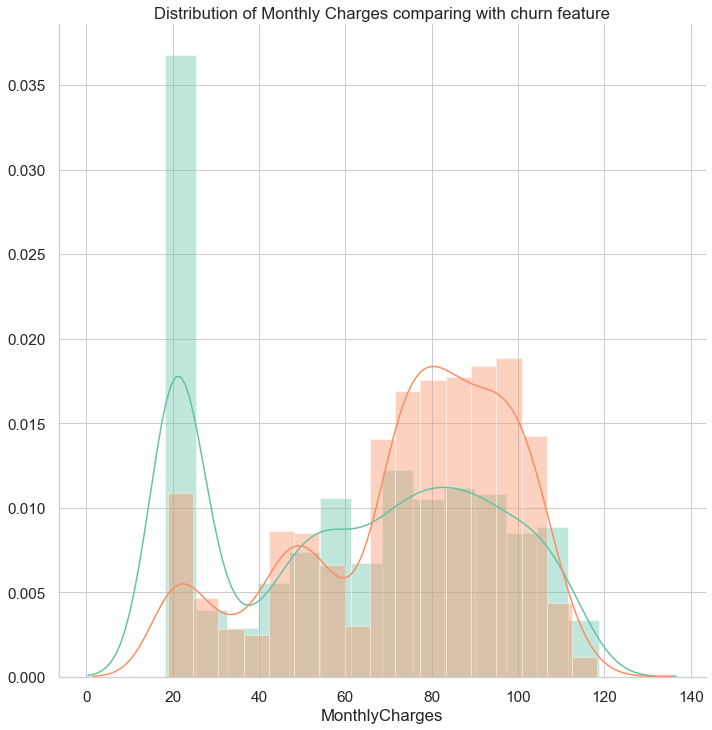

In [64]:
# Exploring the monthly charges feature
plot = sns.set_style("whitegrid");
sns.FacetGrid(telco_df, hue="Churn", size=10, margin_titles = True, palette= "Set2") \
   .map(sns.distplot,"MonthlyCharges")
plt.title('Distribution of Monthly Charges comparing with churn feature')
plt.show();

Higher Monthly charges lead to a higher attrition rate.

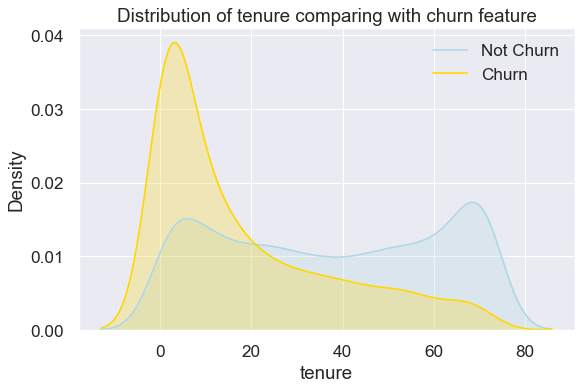

In [142]:
# Exploring the tenure feature
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
g = sns.kdeplot(telco_df.tenure[(telco_df["Churn"] == 'No') ], color="lightblue", shade = True)
g = sns.kdeplot(telco_df.tenure[(telco_df["Churn"] == 'Yes') ], ax =g, color="gold", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Density")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

Customers who Churn are often new customers. Their tenure track is quite low.

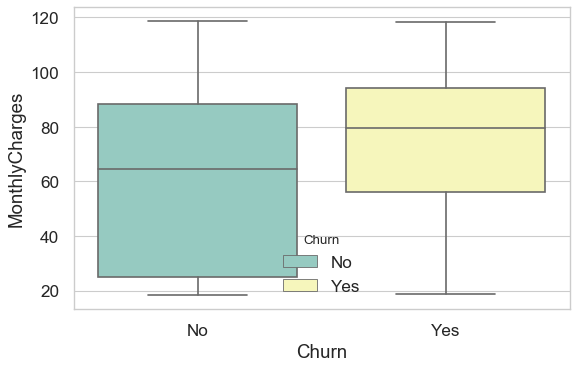

In [66]:
# Exploring the Monthly Charges feature
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', hue = 'Churn', data = telco_df, palette="Set3", dodge = False)
plt.show()

What we also see from here is that people who Churn have relatively high Monthly Charges as compared to customers who don't churn.

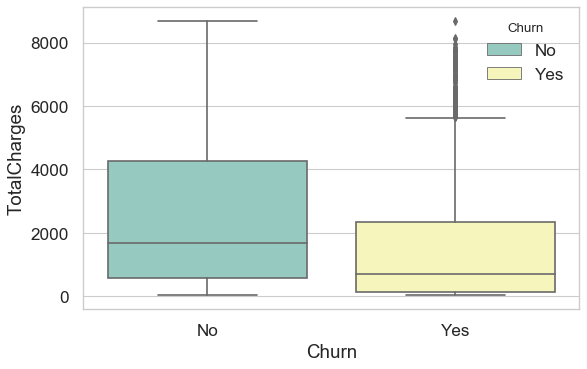

In [67]:
# Exploring the Total Charges feature
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x = 'Churn', y = 'TotalCharges', hue = 'Churn', data = telco_df, palette="Set3", dodge = False)
plt.show()

What we also see from here is that people who Churn have relatively low Total Charges as compared to customers who don't churn.

## 4. Data Preprocessing for Models



This part of the notebook handles all the preprocessing of the dataset before it is sent to any of the models for classification. 

In the earlier part we identified that Tenure and Monthly charges of a customer are primary features which actually shape as to id the customer will churn or not. Here in this section, the Tenure group is classified into 6 separate categories, dummies are gathered for other variables and then every feature is encoded with a value.

### 4.1 Preprocessing

In [68]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#Drop customer ID as it wont affect the churning rate at all
df_tele = telco_df.copy(deep = False)
df_tele.drop(['customerID'], axis=1, inplace=True)

# Defining a function to categorize tenure separately. 
def tenure_cateorize(df_tele) :
    if df_tele["tenure"] <= 12 :
        return "0-12 Mts."
    elif (df_tele["tenure"] > 12) & (df_tele["tenure"] <= 24 ):
        return "12-24 Mts."
    elif (df_tele["tenure"] > 24) & (df_tele["tenure"] <= 48) :
        return "24-48 Mts."
    elif (df_tele["tenure"] > 48) & (df_tele["tenure"] <= 60) :
        return "48-60 Mts."
    elif df_tele["tenure"] > 60 :
        return "grt_60 Mts."
    
df_tele["Tenure_Group"] = df_tele.apply(lambda df_tele:tenure_cateorize(df_tele),axis = 1)

#Seperate feature Tenure_Group with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['Tenure_Group'])

#Seperate feature Paymentvalues with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['PaymentMethod'])

#Seperate feature Contracts with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['Contract'])

#Seperate feature Internet Service with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['InternetService'])

#Separating catagorical and numerical columns for EDA
Id_col     = ['customerID']
target_col = ["Churn"]
numeric_columns = df_tele._get_numeric_data().columns.tolist()
categorical_columns = list(set(df_tele.columns.tolist())- set(numeric_columns) - set(Id_col))
print("Number of Categorical Features: ", len(categorical_columns))
print("Number of Numeric Features: ", len(numeric_columns))

cat_df = df_tele[categorical_columns]
num_df = df_tele[numeric_columns]

# Encoding numerical values to each feature. 
label_encoder = LabelEncoder()
column_names = list(df_tele.columns)

mappings_list = []
for i in range(len(cat_df.columns.tolist())): 
    df = cat_df.iloc[:,i]
    df = label_encoder.fit_transform(df)
    mappings = {index: label for index, label in 
                      enumerate(label_encoder.classes_)}
    mappings_list.append([mappings])


# Creating a dataframe which records all the mappings.
mappings_df = pd.concat([pd.DataFrame(cat_df.columns.tolist(), columns = ['Features']),
             pd.DataFrame(mappings_list, columns = ['Mappings'])], axis =1 , sort = False)
display(mappings_df)
# Creating an encoded data frame from the previous one (to be used for model building). 
cat_en_df = cat_df.apply(label_encoder.fit_transform)

#Creating a dataframe which now carries the encoded categorical features as well as the numerical features
df_tele_en = pd.concat([num_df, cat_en_df], axis = 1, sort = False )

Number of Categorical Features:  14
Number of Numeric Features:  18


,Features,Mappings
0,Dependents,"{0: 'No', 1: 'Yes'}"
1,OnlineBackup,"{0: 'No', 1: 'Yes'}"
2,gender,"{0: 'Female', 1: 'Male'}"
3,Churn,"{0: 'No', 1: 'Yes'}"
4,StreamingTV,"{0: 'No', 1: 'Yes'}"
5,PhoneService,"{0: 'No', 1: 'Yes'}"
6,DeviceProtection,"{0: 'No', 1: 'Yes'}"
7,StreamingMovies,"{0: 'No', 1: 'Yes'}"
8,Partner,"{0: 'No', 1: 'Yes'}"
9,PaperlessBilling,"{0: 'No', 1: 'Yes'}"


### 4.2 Standardization

In [69]:
# Here we standardize the remaining two columns Totalcharges and MonthlyCharges (Numerical columns) 
df_tele_en[['TotalCharges', 'MonthlyCharges']] = StandardScaler().fit_transform(df_tele_en[['TotalCharges', 'MonthlyCharges']])
pd.set_option('display.max_columns', None)
df_tele_en.head()

,tenure,MonthlyCharges,TotalCharges,Tenure_Group_0-12 Mts.,Tenure_Group_12-24 Mts.,Tenure_Group_24-48 Mts.,Tenure_Group_48-60 Mts.,Tenure_Group_grt_60 Mts.,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Dependents,OnlineBackup,gender,Churn,StreamingTV,PhoneService,DeviceProtection,StreamingMovies,Partner,PaperlessBilling,MultipleLines,SeniorCitizen,TechSupport,OnlineSecurity
0,1,-1.161694,-0.994194,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
1,34,-0.260878,-0.173740,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1
2,2,-0.363923,-0.959649,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1
3,45,-0.747850,-0.195248,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
4,2,0.196178,-0.940457,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


### 4.3 Balancing using SMOTE 

The idea behind using the SMOTE is to bring balance into the dataset by increasing the rate of the minority subset (which in our case are the customers who Churn - 26.6% of the dataset). 

_After continious testing it was found that all models work better with a balanced dataset rather than imbalanced one_

(5163, 32) (1869, 32)


Text(0, 0.5, 'Density')

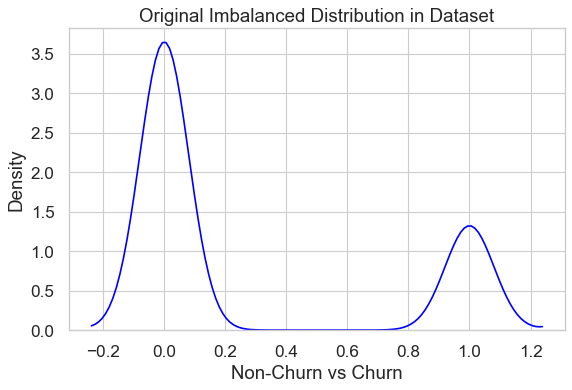

In [70]:
## Redefining the churn and the Non_Churn dataset after preprocessing 
Churn = df_tele_en[df_tele_en['Churn']==0]
Non_Churn = df_tele_en[df_tele_en['Churn']==1]
print(Churn.shape, Non_Churn.shape)

# # Plotting the imbLanced dataset
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(df_tele_en['Churn'], hist=False, kde=True, 
             bins=2, color = 'blue',
             hist_kws={"rwidth":1.0,'edgecolor':'black'})
# Add labels
plt.title('Original Imbalanced Distribution in Dataset')
plt.xlabel('Non-Churn vs Churn')
plt.ylabel('Density')

From the density plot we can clearly see that there is a huge imbalance in how the data for Churn and Non Churn is originally presented.

In [71]:
# Setting the target and feature space for balanced dataset
X = df_tele_en.loc[:, df_tele_en.columns != 'Churn']
X.drop(['tenure'], axis =1, inplace = True)
Y = df_tele_en['Churn']

# Handling Oversampling for the given dataset using SMOTE
smt = SMOTE(random_state=42)
x_smt, y_smt = smt.fit_sample(X,Y) 

In [72]:
# Defining the target and train variable
Y_train = pd.DataFrame({'Churn': y_smt[0:, ]})['Churn']
X_train = pd.DataFrame(data = x_smt,
                 index=[i for i in range(x_smt.shape[0])],
                 columns=['f'+ str(i) for i in range(x_smt.shape[1])])

Text(0, 0.5, 'Density')

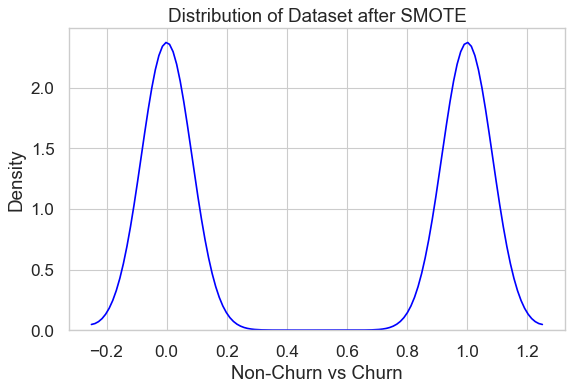

In [73]:
# After Oversampling we plot the baLanced dataset
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(Y_train, hist=False, kde=True, 
             bins=2, color = 'blue',
             hist_kws={"rwidth":1.0,'edgecolor':'black'})
# Add labels
plt.title('Distribution of Dataset after SMOTE')
plt.xlabel('Non-Churn vs Churn')
plt.ylabel('Density')

Now from the balanced data set we see clearly that both classes have been balanced.

## 5. Model Building

In the following Section, we will use different methods to classify our data. We will also use Confusion Matrices and curves such as ROC and Precision-Recall to evaluate our results. 

### 5.1 Strategy

Machine Learning Models are optimized through tuning their hyperparamters. What we found out in our two month long exploration with the specified models is that some models work better when we use a higher dimensional dataset (the original feature space), while some models work better with reduction of higher dimensional feature space (after PCA). 

Thus, we specified two separate sections: __1) Models evaluated in Reduced Dimensional space 2) Models evaluated in Higher dimensional space.__

__Evaluation Parameters of Each Model:__

The Area under the receiver operating characteristic curve (ROC AUC) shows the performance of the classification model at all thresholds. It plots the TPR, i.e. recall, against the FPR. 

Precision-Recall curves give us the trade-off between TPR and the positive predictive value for a predictive model. The positive predictive value of a model is the ratio between true positives and total number of cases classified as positives (the sum of true and false positives), and it is also called precision. Recall is the ratio between true positives and actual number of positives, i.e. TP plus false negatives.

The F1 score gives the skill of the model for a specific probability threshold and is the harmonic mean of Precision and Recall. Given that this score is high but a bit lower than AUC, we can say that the threshold was chosen properly.

### 5.2 Defining Functions for Plotting.

In [74]:
# Building some visualization functions to be used for each model as well as model comparisions
def roc_conf_plot(classifier, x_train = None, y_train = None, x_test = None,  y_test = None):
    
    # Fitting the model
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    roc_score = roc_auc_score(y_test, y_pred)
    prob = classifier.predict_proba(x_test)
    
    # Setting traces for the ROC plot
    fpr,tpr,thresholds = roc_curve(y_test,prob[:,1])
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(roc_score),
                        line = dict(color = ('purple'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('red'),width = 2,
                        dash = 'dot'))
    Layout = go.Layout(dict(title = "Receiver Operator Characteristics Curve",
                           showlegend = False,
                           xaxis = dict(title = "False positive rate",
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "True positive rate",
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2)
                           )
                           )
    data = [trace1, trace2]
    figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
    fig = go.Figure(data= data, layout = Layout)
    py.iplot(fig)
    print("Area under curve : ", roc_score)

# Generates the threshold plot for the specified model
def threshold_plot(algorithm, x, y):
  figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
  visualizer = DiscriminationThreshold(algorithm)
  visualizer.fit(x,y)
  visualizer.poof()


# Creating row table for the metric comparision of each model.
def model_metric(model, x_train, y_train, x_test, y_test, name):
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    roc = roc_auc_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    row_df = pd.DataFrame({
                       "Model"           : [name],
                       "Accuracy_score"  : [acc],
                       "Recall_score"    : [recall],
                       "Precision"       : [prec],
                       "f1_score"        : [f1],
                       "Area_under_curve": [roc],
                     
    })
    return row_df

### 5.3 Models Evaluated in Reduced Dimensional Space

We use a random seed to initialize a pseudorandom number generator in order to preserve reproducibility.

In [75]:
import random
random.seed(30)

#### 5.3.1 Logistic Regression with Cross Validation (Baseline Model)

For the Logistic Regression we will be using the MinMax Scaler rather than the StandardScaler in the train and test split. Experience with ML models teaches us that MinMax Scaler works better for Logistic models. In general, the speed of updating each feature depends on its scale, and in the end some coefficients are closer to the optimum than the others. Scaling softens this, because coefficients are now at the same scale and update roughly at the same speed.

In [76]:
# Scaling all the variables to a range of 0 to 1
scaler = MinMaxScaler()
X_log = scaler.fit_transform(X_train)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, Y_train, test_size=0.25, random_state=0)

#### - Running PCA for Dimensionality Reduction

In total we have 30 features which need to be analyzed in every ML model that we run. This severly affects computation as inverses have to be taken in order to find the closed form solutions. In order to have a more realistic perspective on how our features behave for each customer, we use PCA for such a dimensionality reduction. The next best-fitting line can be chosen from directions perpendicular from all features (separately) in a higher dimension. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called principal components which are then used for model building.

Explained variance: 1.0


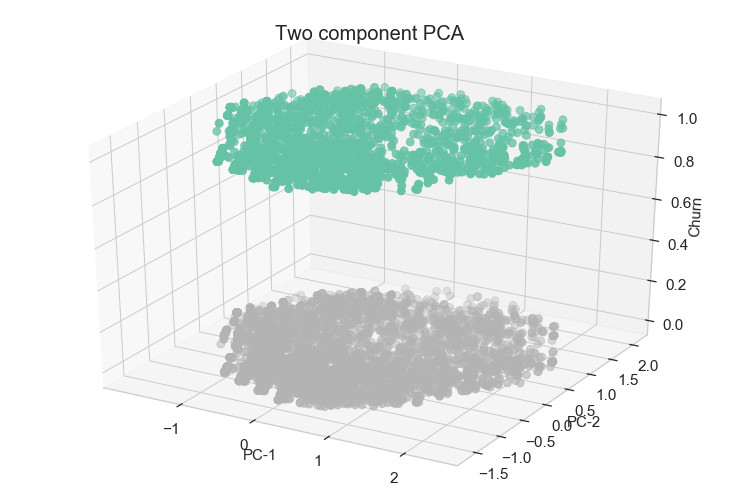

In [77]:
# Running PCA 
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train_log)
x_test_pca = pca.transform(X_test_log)
pca.fit(x_train_pca)

principalDf = pd.DataFrame(data = x_train_pca
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train_log], axis = 1)

fig = plt.figure(figsize=(13,9))
ax = plt.axes(projection='3d')
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_zlabel("Churn", fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
ax.scatter3D(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['Churn'], c = finalDf['Churn'], cmap="Set2_r",s = 60)
ax.grid()

print('Explained variance: {}'.format(np.sum(pca.explained_variance_ratio_)))

The two prinicpal components can be seen separately above for both Churn and Non-Churn customers. It can also be seen that 100.0% of the variation in the dataset can be explained by the prinicipal component vectors thus we don't need to add any more components.

In [78]:
# Finding best paramters for Logistic Regression CV
parameters = {'solver':('lbfgs', 'liblinear', 'sag', 'saga'),'fit_intercept':(True,False)}
logreg = LogisticRegressionCV(max_iter = 1000000)
logreg_cv = GridSearchCV(logreg, parameters)
logreg_cv.fit(x_train_pca, y_train_log)
print("Tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'fit_intercept': True, 'solver': 'lbfgs'}


In [79]:
# Fitting the model with the best parameters that were identified above.
model_LCV = LogisticRegression(solver='lbfgs', fit_intercept=True, penalty = 'l2',C= 100.0, max_iter=1000000)
model_LCV.fit(x_train_pca, y_train_log)
y_pred_LCV = model_LCV.predict(x_test_pca)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1277
           1       0.78      0.79      0.78      1305

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582



Area under curve :  0.7795644725275055


<Figure size 640x400 with 0 Axes>

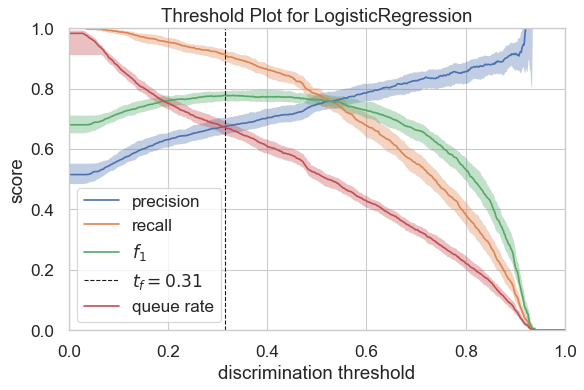

In [80]:
# Printing the classification report of the model.
print(classification_report(y_test_log, y_pred_LCV))

# Constructing the threshold plot and the ROC plot.
roc_conf_plot(model_LCV, x_train_pca, y_train_log,  x_test_pca, y_test_log)
threshold_plot(model_LCV, x_train_pca, y_train_log)
LCV_model = model_metric(model_LCV, x_train_pca, y_train_log, x_test_pca, y_test_log, "Logistic Regression CV")

The AUC for the Logistic Regression with CV is 78.5%. This means that this baseline model correctly classifies true positives and true negatives with a 77.95% probability, which means there is a poissibility of around 22.05% of  type 1 and type 2 errors (false positives and negatives). 

A feature of AUC is that it is classification-threshold-invariant. However, this is not the best feature for our classification purposes, given that we want to prioritise the minimization of Type II errors which classifies the customers who in reality will churn but show up as Non-Churn. 

### 5.4 Models Evaluated in Higher Dimensional Space

We use a random seed to initialize a pseudorandom number generator in order to preserve reproducibility.

In [81]:
import random
random.seed(30)

#### - Setting the  train and test split (75%, 25%)

In [82]:
# Setting the same test and train split for all models so its easy to compare (at 25% split)
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

#### 5.4.1 K Nearest Neighbour

The K Nearest Neighbor model is used to classify the sample depending on the k-most similar or nearest instance in the training data. Specifically we compute the Euclidean distance between a single data point against all points in the training set. In our project we used KNN with a k value of 10 to achieve the the most optimal results.

In [83]:
# Finding the best parameters for KNN
grid = {"n_neighbors":[1,2,4,5,6,7,8,9,10]}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=10)
knn_cv.fit(x_train,y_train)
print("Tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)

Tuned hpyerparameters :(best parameters)  {'n_neighbors': 1}


In [84]:
# Use the best parameters to fit the model
model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(x_train,y_train)
y_pred_KNN = model_KNN.predict(x_test)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1277
           1       0.79      0.90      0.84      1305

    accuracy                           0.83      2582
   macro avg       0.84      0.83      0.83      2582
weighted avg       0.84      0.83      0.83      2582



Area under curve :  0.8279798498036285


<Figure size 640x400 with 0 Axes>

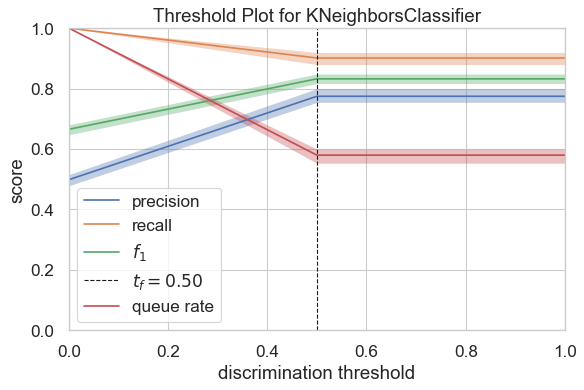

In [85]:
# Printing the classification report of the model.
print(classification_report(y_test,y_pred_KNN))

# Constructing the threshold plot and the ROC plot.
roc_conf_plot(model_KNN, x_train, y_train, x_test, y_test)
threshold_plot(model_KNN, x_train, y_train)
knn_model = model_metric(model_KNN,x_train,y_train,x_test,y_test, "K - NN")

#### 5.4.2 Support Vector Machines 

Note: For Support Vector Machines and all the following models after this, we will be using the global train and test split for all computations.

Using high dimensional feature space, the Support vector Machine makes an effort to efficiently discriminate between churners and non-churners by constructing hyper-planes while simultaneously maximizing the space between the hyper-planes. Using a kernel function the SVM maps the space where the data points can’t be linearly separated into a space where they will separated. We exclusively report on SVM with ‘RBF’ kernel and a penalty parameter C = 10000 because we archived the highest accuracy when testing with these settings

In [86]:
# Finding the best parameters for SVM
parameters = {'kernel':( 'linear','rbf','sigmoid'), 'C':[1e-2,1e-1,1e0,1e1,1e2,3,10]}
model_SVC = SVC()
svclassifier_cv = GridSearchCV(model_SVC,parameters)
svclassifier_cv.fit(x_train, y_train)
print("Tuned hyperparameters :(best parameters) ",svclassifier_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'C': 100.0, 'kernel': 'rbf'}


In [87]:
# Use the best parameters to fit the model
model_SVC = SVC(kernel='rbf',C=100, probability = True)
model_SVC.fit(x_train, y_train)
model_SVC.score(x_test, y_test)
y_pred_SVC = svclassifier_cv.predict(x_test)

In [88]:
# Printing the classification report of the model.
print(classification_report(y_test,y_pred_SVC))

# Constructing the threshold plot and the ROC plot.
roc_conf_plot(model_SVC, x_train, y_train, x_test, y_test)
# threshold_plot(model_SVC, x_train, y_train)
SVM_model = model_metric(model_SVC,x_train,y_train,x_test,y_test, "Support Vector Machine")

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1277
           1       0.84      0.87      0.85      1305

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



Area under curve :  0.8494927947146238


<Figure size 640x400 with 0 Axes>

#### 5.4.3 Decision Trees

The Decision Tree Classifier has a tree shaped structure which can be used to discover rules in a classification task. Each tree is distinctly used to represents a decision. The aim is to predict the target variable by selecting features with the highest information gain at each node.

In [89]:
# Finding the best parameters for Decision Trees
parameters = {'criterion':('gini','entropy'),'max_depth': range(1,20,2)}
dectree = DecisionTreeClassifier()
dectree_cv = GridSearchCV(dectree,parameters)
dectree_cv.fit(x_train,y_train)
print("Tuned hyperparameters :(best parameters) ",dectree_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 7}


In [90]:
# Use the best parameters to fit the model
model_DT = DecisionTreeClassifier(criterion="gini",random_state=0, max_depth=7)
model_DT.fit(x_train,y_train)
y_pred_DT = model_DT.predict(x_test)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1277
           1       0.77      0.84      0.80      1305

    accuracy                           0.79      2582
   macro avg       0.80      0.79      0.79      2582
weighted avg       0.80      0.79      0.79      2582



Area under curve :  0.7934634875201396


<Figure size 640x400 with 0 Axes>

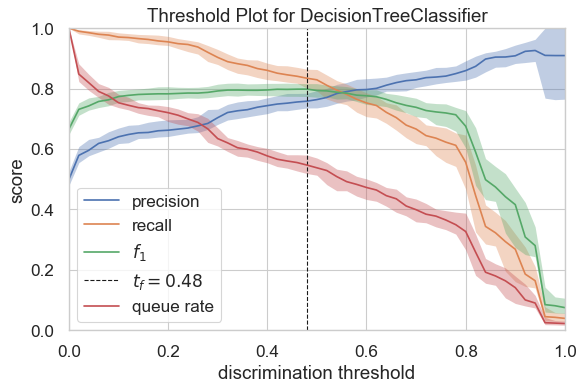

In [91]:
# Printing the classification report of the model.
print(classification_report(y_test,y_pred_DT))

# Constructing the threshold plot and the ROC plot
roc_conf_plot(model_DT, x_train, y_train, x_test, y_test)
threshold_plot(model_DT, x_train, y_train)
DT_model = model_metric(model_DT,x_train,y_train,x_test,y_test, "Decision Tree")

#### 5.4.4 Random Forest

Random forest classifier is an ensemble learning classification model. It randomly selects feature and creates a cluster of decision trees based on the training data provided. This helps us solve any over fitting problem which is caused by a sole decision tree. Once again we used the Grid Search method to find the optimal number of decision trees to be used in the model.

In [92]:
# Finding the best parameters for RF
parameters= {'n_estimators':[10,50,100,500,1000],'max_depth': range(1,20,2)}
RFC = RandomForestClassifier()
RFC_cv = GridSearchCV(RFC,parameters)
RFC_cv.fit(x_train,y_train)
print("Tuned hyperparameters :(best parameters) ",RFC_cv.best_params_)

Tuned hyperparameters :(best parameters)  {'max_depth': 15, 'n_estimators': 500}


In [93]:
# Use the best parameters to fit the model
model_RFC = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=1)
model_RFC.fit(x_train, y_train)
accuracy = model_RFC.score(x_test, y_test)
y_pred_RFC = model_RFC.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1277
           1       0.86      0.89      0.87      1305

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582



Area under curve :  0.8669525978331638


<Figure size 640x400 with 0 Axes>

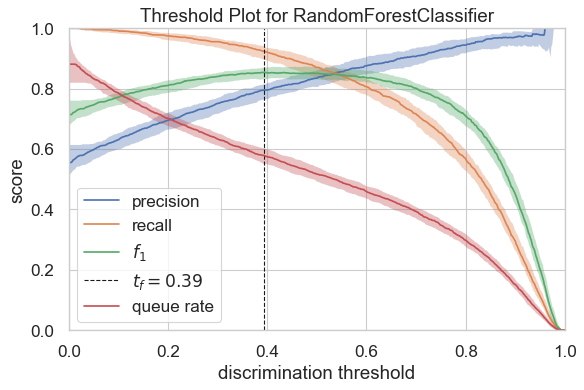

In [94]:
# Printing the classification report of the model.
print(classification_report(y_test,y_pred_RFC)) 

# Constructing the threshold plot and the ROC plot
roc_conf_plot(model_RFC, x_train, y_train, x_test, y_test)
threshold_plot(model_RFC, x_train, y_train)
RF_model = model_metric(model_RFC,x_train,y_train,x_test,y_test, "Random Forest")

#### 5.4.5 Neural Network

In [95]:
# Building the NN architecture
model_NN = Sequential()
classes=1
model_NN.add(Dense(24,activation='relu',input_dim=30,kernel_initializer='glorot_uniform', bias_initializer='zeros')) 
model_NN.add(Dense(classes,activation='sigmoid'))

model_NN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [96]:
# Training the neural network
np.random.seed(7)
history = model_NN.fit(x_train, y_train,shuffle=True,
          batch_size=5, epochs=70,verbose=1,validation_split=0.2)
y_pred_NN = model_NN.predict(x_test)
y_pred_NN =(y_pred_NN > 0.5)   
eval_model = model_NN.evaluate(x_test, y_test, verbose=0)

Train on 6195 samples, validate on 1549 samples
Epoch 1/70
6195/6195 [==============================] - 5s 885us/step - loss: 0.5067 - accuracy: 0.7533 - val_loss: 0.4779 - val_accuracy: 0.7708
Epoch 2/70
6195/6195 [==============================] - 5s 863us/step - loss: 0.4694 - accuracy: 0.7753 - val_loss: 0.4701 - val_accuracy: 0.7740
Epoch 3/70
6195/6195 [==============================] - 5s 842us/step - loss: 0.4642 - accuracy: 0.7803 - val_loss: 0.4689 - val_accuracy: 0.7708
Epoch 4/70
6195/6195 [==============================] - 4s 590us/step - loss: 0.4601 - accuracy: 0.7810 - val_loss: 0.4665 - val_accuracy: 0.7715
Epoch 5/70
6195/6195 [==============================] - 4s 571us/step - loss: 0.4558 - accuracy: 0.7837 - val_loss: 0.4621 - val_accuracy: 0.7676
Epoch 6/70
6195/6195 [==============================] - 4s 588us/step - loss: 0.4537 - accuracy: 0.7866 - val_loss: 0.4636 - val_accuracy: 0.7753
Epoch 7/70
6195/6195 [==============================] - 4s 703us/step - loss

6195/6195 [==============================] - 4s 583us/step - loss: 0.3861 - accuracy: 0.8236 - val_loss: 0.4487 - val_accuracy: 0.7850
Epoch 57/70
6195/6195 [==============================] - 3s 546us/step - loss: 0.3833 - accuracy: 0.8249 - val_loss: 0.4681 - val_accuracy: 0.7669
Epoch 58/70
6195/6195 [==============================] - 3s 556us/step - loss: 0.3856 - accuracy: 0.8226 - val_loss: 0.4512 - val_accuracy: 0.7773
Epoch 59/70
6195/6195 [==============================] - 3s 550us/step - loss: 0.3850 - accuracy: 0.8263 - val_loss: 0.4505 - val_accuracy: 0.7766
Epoch 60/70
6195/6195 [==============================] - 4s 565us/step - loss: 0.3830 - accuracy: 0.8257 - val_loss: 0.4513 - val_accuracy: 0.7792
Epoch 61/70
6195/6195 [==============================] - 4s 606us/step - loss: 0.3832 - accuracy: 0.8295 - val_loss: 0.4557 - val_accuracy: 0.7766
Epoch 62/70
6195/6195 [==============================] - 4s 695us/step - loss: 0.3822 - accuracy: 0.8303 - val_loss: 0.4541 - val_

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1277
           1       0.77      0.87      0.82      1305

    accuracy                           0.80      2582
   macro avg       0.81      0.80      0.80      2582
weighted avg       0.81      0.80      0.80      2582



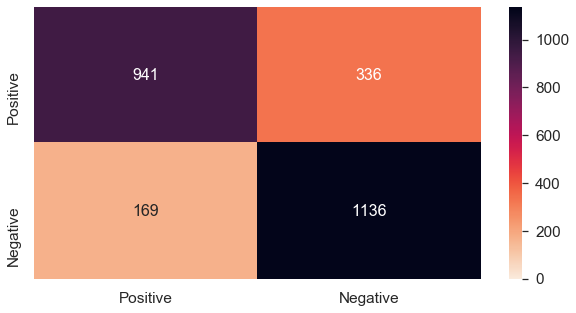

Area under curve :  0.8036907022865493


<Figure size 640x400 with 0 Axes>

In [97]:
# Printing the classification report of the model.
print(classification_report(y_test,y_pred_NN))

# Getting the confusion matrix of the NN separately.
cmap = sns.cm.rocket_r
sns.set(font_scale=1.4)
conf_df = pd.DataFrame(confusion_matrix(y_test,y_pred_NN).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
sns.heatmap(conf_df, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap)
plt.show()

# Plotting the AUC curve
roc_score = roc_auc_score(y_test, y_pred_NN)
prob = model_NN.predict_proba(x_test)

# Setting traces for the ROC plot
fpr,tpr,thresholds = roc_curve(np.array(y_test), prob)
trace1 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(roc_score),
                    line = dict(color = ('purple'),width = 2),
                   )
trace2 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('red'),width = 2,
                    dash = 'dot'))
Layout = go.Layout(dict(title = "Receiver Operator Characteristics Curve",
                       showlegend = False,
                       xaxis = dict(title = "False positive rate",
                                     domain=[0, 0.6],
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(title = "True positive rate",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2)
                       )
                       )
data = [trace1, trace2]
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
fig = go.Figure(data= data, layout = Layout)
py.iplot(fig)
print("Area under curve : ", roc_score)

# Collecting model metrics for Neural Network
NN_df = pd.DataFrame({
                       "Model"           : ["Neural Network"],
                       "Accuracy_score"  : [accuracy_score(y_test,y_pred_NN)],
                       "Recall_score"    : [recall_score(y_test,y_pred_NN)],
                       "Precision"       : [precision_score(y_test,y_pred_NN)],
                       "f1_score"        : [f1_score(y_test,y_pred_NN)],
                       "Area_under_curve": [roc_auc_score(y_test, y_pred_NN)],
                      
})

## 6. Model Comparison

In this section we compare all the models that were evaluated above in a cumulative manner.

### 6.1 Overall Comparison

In [98]:
# We used the model comparision function after each model to record model performance
# Now concatinating the all models to make a combined dataframe
model_comparison_df = pd.concat([LCV_model,RF_model,knn_model,DT_model,SVM_model, NN_df], ignore_index=True,axis= 0, sort= False)
model_comparison_df = model_comparison_df.sort_values('Accuracy_score')
display(model_comparison_df)

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression CV,0.779628,0.785441,0.780061,0.782742,0.779564
3,Decision Tree,0.793958,0.839080,0.772759,0.804555,0.793463
5,Neural Network,0.804415,0.870498,0.771739,0.818149,0.803691
2,K - NN,0.828815,0.904981,0.787859,0.842368,0.827980
4,Support Vector Machine,0.849729,0.871264,0.837878,0.854245,0.849493
1,Random Forest,0.867157,0.885824,0.856296,0.870810,0.866953


### 6.2 AUC and Accuracy Comparison

In [141]:
# Plotting Accuracy scores and Area under curve comparison plots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x = model_comparison_df['Accuracy_score'].tolist(),
    y = model_comparison_df['Model'].tolist(),
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1)),
#     size = 15,
    name='Accuracy score of each model',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x= model_comparison_df['f1_score'].tolist(), 
    y= model_comparison_df['Model'].tolist(),
    mode = 'lines+markers',
    line_color = 'rgb(128, 0, 128)',
    name = 'F1 Score of each model',
    textfont = dict(size = 200),
), 1, 2)

fig.update_layout(
    title='Accuracy score and F1-score of each Model',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.05, 0.42],
        dtick=0.25,
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        range=[0.75, 1.0],
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=0.05,
    ),
    legend=dict(x=0.029, y=1.038, font_size=8),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(model_comparison_df['Accuracy_score'].tolist(), decimals=4)
y_nw = np.round(model_comparison_df['f1_score'].tolist(), decimals=4)

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, model_comparison_df['Model']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn + 0.02,
                            text='{:.3f}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 0.08,
                            text='{:.3f}'.format(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.08, y=-0.109,
                        text='Telco Churn Dataset"' +
                             '(Accessed on 05 March 2020)',
                        font=dict(family='Arial', size=10, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

### 6.3 Confusion Matrix Comparison

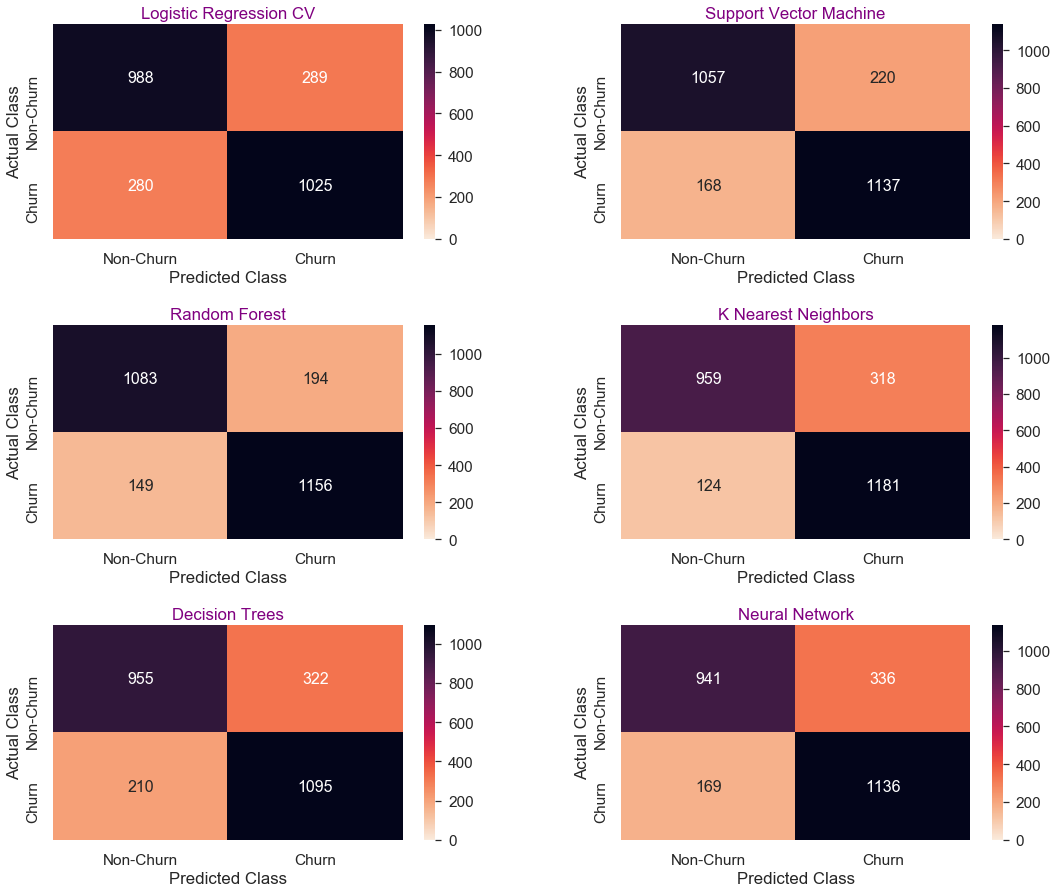

In [100]:
# Plotting all confusion matrix for all models
y = [y_pred_LCV, y_pred_SVC, y_pred_RFC, y_pred_KNN, y_pred_DT, y_pred_NN]

conf_df_LCV = pd.DataFrame(confusion_matrix(y_test,y_pred_LCV).tolist(), columns = ['Non-Churn','Churn'], index = ['Non-Churn','Churn'])
conf_df_SVC = pd.DataFrame(confusion_matrix(y_test,y_pred_SVC).tolist(), columns = ['Non-Churn','Churn'], index = ['Non-Churn','Churn'])
conf_df_RFC = pd.DataFrame(confusion_matrix(y_test,y_pred_RFC).tolist(), columns = ['Non-Churn','Churn'], index = ['Non-Churn','Churn'])
conf_df_KNN = pd.DataFrame(confusion_matrix(y_test,y_pred_KNN).tolist(), columns = ['Non-Churn','Churn'], index = ['Non-Churn','Churn'])
conf_df_DT = pd.DataFrame(confusion_matrix(y_test,y_pred_DT).tolist(), columns = ['Non-Churn','Churn'], index = ['Non-Churn','Churn'])
conf_df_NN = pd.DataFrame(confusion_matrix(y_test,y_pred_NN).tolist(), columns = ['Non-Churn','Churn'], index = ['Non-Churn','Churn'])

fig, (ax1, ax2, ax3) = plt.subplots(3,2, figsize=(18,15))
sns.heatmap(conf_df_LCV, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax1[0])
sns.heatmap(conf_df_SVC, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax1[1])
sns.heatmap(conf_df_RFC, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax2[0])
sns.heatmap(conf_df_KNN, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax2[1])
sns.heatmap(conf_df_DT, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax3[0])
sns.heatmap(conf_df_NN, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax3[1])

ax1[0].set_title('Logistic Regression CV', color = 'purple')
ax1[1].set_title('Support Vector Machine', color = 'purple')
ax2[0].set_title('Random Forest', color = 'purple')
ax2[1].set_title('K Nearest Neighbors', color = 'purple')
ax3[0].set_title('Decision Trees', color = 'purple')
ax3[1].set_title('Neural Network', color = 'purple')

axes = [ax1[0],ax1[1],ax2[0],ax2[1],ax3[0],ax3[1]]
for i in axes:
    i.set_xlabel('Predicted Class')
    i.set_ylabel('Actual Class')


# plt.tight_layout()
plt.subplots_adjust(wspace = .3,hspace = .4)
plt.show()

### 6.4 Precision Recall Curves Comparison

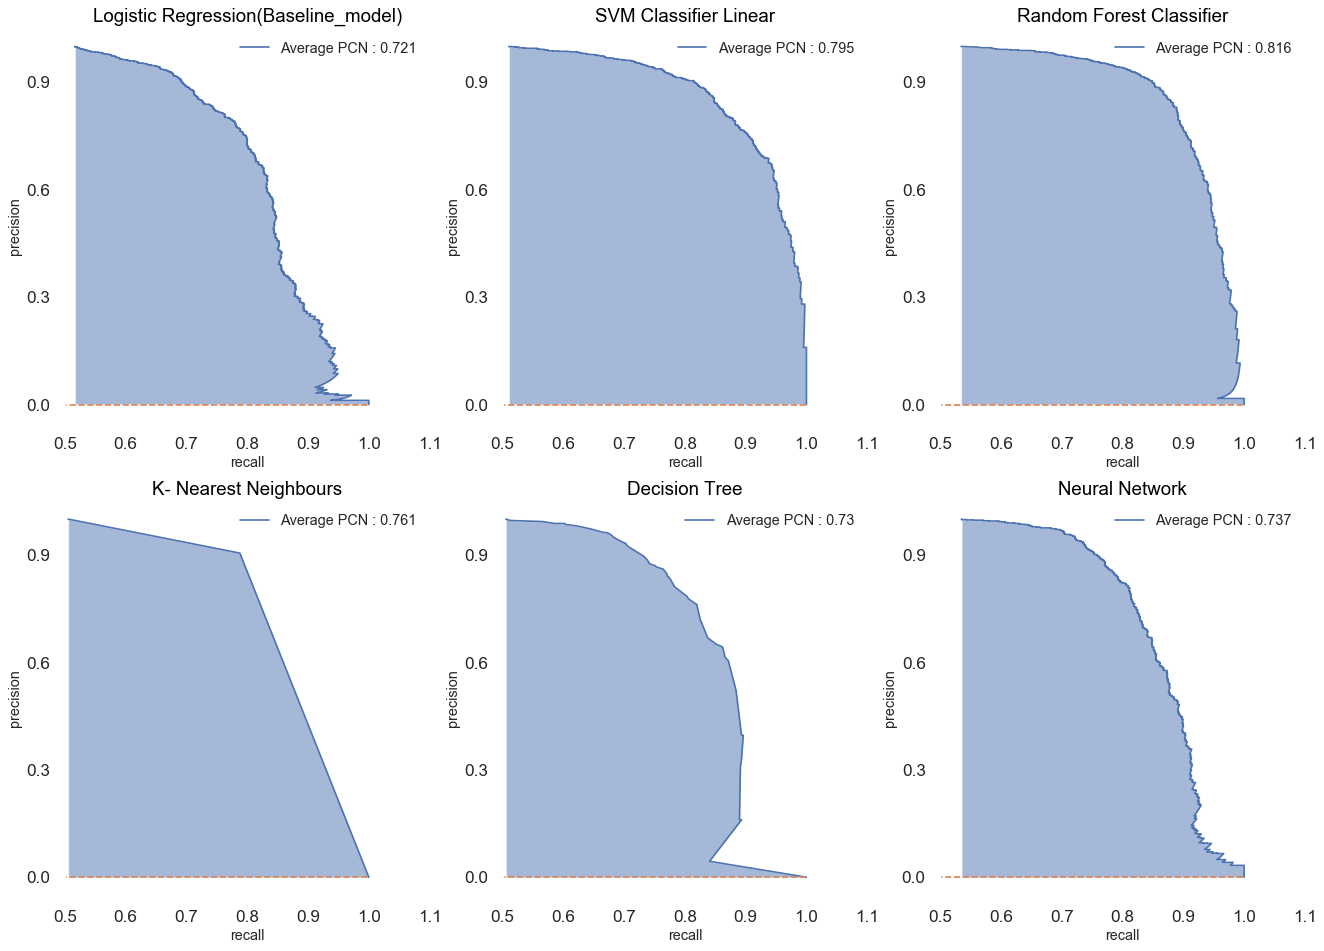

In [101]:
#Plotting all Precision Recall curves together. Acknowledgement must be given to Pavan for constructing the original method for plotting.
import itertools

lst    = [model_LCV,model_SVC,model_RFC,model_KNN,model_DT,model_NN]
length = len(lst)
mods   = ['Logistic Regression(Baseline_model)',
          'SVM Classifier Linear',
          'Random Forest Classifier',
          'K- Nearest Neighbours',
          'Decision Tree',
          'Neural Network']

figure(num=None, figsize=(20, 30), dpi=80, facecolor='w', edgecolor='k')
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    if i == model_LCV:
        probabilities = i.predict_proba(x_test_pca)
        predictions   = i.predict(x_test_pca)
        recall,precision,thresholds = precision_recall_curve(y_test_log,probabilities[:,1])
        plt.plot(recall,precision,linewidth = 1.5,
                 label = ("Average PCN : {}".format(np.around(average_precision_score(y_test_log,predictions),3))))
    elif i == model_NN:
        prob = model_NN.predict_proba(x_test)
        recall,precision,thresholds = precision_recall_curve(np.array(y_test),prob)
        plt.plot(recall,precision,linewidth = 1.5,
                 label = ("Average PCN : {}".format(np.around(average_precision_score(y_test,y_pred_NN),3))))
    else:
        
        probabilities = i.predict_proba(x_test)
        predictions   = i.predict(x_test)
        recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])

        plt.plot(recall,precision,linewidth = 1.5,
                 label = ("Average PCN : {}".format(np.around(average_precision_score(y_test,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = 0.5)
    plt.legend(loc = "upper right",
               prop = {"size" : 13})
    qx.set_facecolor("w")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "black")
    plt.xlabel("recall",fontsize =13)
    plt.ylabel("precision",fontsize =13)
    plt.xlim([0.5,1.1])
    plt.yticks(np.arange(0,1,.3))

## 7. Conclusion

Churning customers are always going to be an inescapable factor in the telecommunication industry. However, it is in the sole hands of the company to reduce the attrition rate through customer retention strategies. In this project, six supervised machine learning models were evaluated for correctly predicting the churned customers. The original dataset was split into 75\% training and 25\% as testing class. In order to find the best hyper-parameters across all models, Grid Search technique along with cross validation was used. The dataset was heavily imbalanced towards the Non-Churn customers which initially resulted in poor performance across all models. In order to overcome such a barrier, an oversampling technique SMOTE was used to induce balance in the binary classes. The result of such a process was a significantly improved accuracy score across all classification models. Through our obtained results it could be seen that the Random Forest classifier outmatched all other tested machine learning models with an accuracy of $\approx$ 87\%.

## 8. Acknowledgements

_This project wouldn't have been possible if it weren't through the guidance and practical knowledge that we received through our professors and colleagues throughout the course of our degree. In particular we want to thank Prof Dr. Andreas Krause at ETH, Prof Dr. Renato Pajarola and Prof Dr. Sven Helmer at UZH. Also, not to forget is the guidance that we received from multiple ML enthusiasts at the kernels at Kaggle._